In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
FILE="crime.csv"

In [19]:
dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

d = pd.read_csv(FILE,
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code',  'Police_Districts', 'Month', 'Lon',
       'Lat'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Text_General_Code':str,
              'Police_Districts':str,'Month':str,'Lon':float,'Lat':float},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# Fix Month to datetime Month
d['Month'] = d['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))

In [17]:
Dat = pd.to_datetime(d.Dispatch_Date_Time)
d['month'] = Dat.dt.month
d['year'] = Dat.dt.year
d['day'] = Dat.dt.day

In [5]:
d.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800,Other Assaults,NaN,2009-10-01,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600,All Other Offenses,NaN,2009-05-01,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800,Other Assaults,NaN,2009-08-01,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500,Weapon Violations,20,2009-07-01,-75.130477,40.036389
4,09,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600,All Other Offenses,8,2009-06-01,-75.16635,39.969532


In [7]:
d.describe()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
count,2191142,2191142,2191142,2191142,2191142,2191142,2191142,2191142,2190771,2190771,2171594,2191142,2174128,2174128
unique,25,30,1702403,3988,1440,24,2191142,115594,26,33,22,132,196651,168847
top,15,2,2014-07-31 14:28:00,2006-08-08,16:24:00,16,201005016851,4600 BLOCK E ROOSEVELT BLVD,2600,All Other Offenses,11,2006-08-01 00:00:00,-75.078182,40.022416
freq,180942,473569,37,877,2427,131529,1,4376,430127,430127,179479,21952,4009,4012
first,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,NaN,NaN
last,NaN,NaN,2016-12-01 02:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,NaN,NaN


In [10]:
d['Text_General_Code'].unique()

array(['Other Assaults', 'All Other Offenses', 'Weapon Violations',
       'Thefts', 'Burglary Non-Residential', 'Aggravated Assault Firearm',
       'Theft from Vehicle', 'Disorderly Conduct',
       'Vandalism/Criminal Mischief', 'Arson', 'Fraud',
       'Robbery No Firearm', 'Vagrancy/Loitering', 'Motor Vehicle Theft',
       'Recovered Stolen Motor Vehicle', 'Robbery Firearm', 'Embezzlement',
       'Rape', 'DRIVING UNDER THE INFLUENCE', 'Forgery and Counterfeiting',
       'Narcotic / Drug Law Violations', 'Burglary Residential',
       'Other Sex Offenses (Not Commercialized)', 'Liquor Law Violations',
       'Aggravated Assault No Firearm', 'Homicide - Criminal',
       'Gambling Violations', 'Prostitution and Commercialized Vice',
       'Public Drunkenness', 'Receiving Stolen Property',
       'Homicide - Gross Negligence',
       'Offenses Against Family and Children', 'Homicide - Justifiable',
       nan], dtype=object)

In [11]:
# Count of 1 for each record. Nice to have a standard column name
d['Value'] = 1


# Use sum. We're summing up all  Dc_Dist
g=d.groupby(['Month','Text_General_Code'])['Value'].sum().reset_index()

g.head()

,Month,Text_General_Code,Value
0,2006-01-01,Aggravated Assault Firearm,277
1,2006-01-01,Aggravated Assault No Firearm,468
2,2006-01-01,All Other Offenses,4295
3,2006-01-01,Arson,44
4,2006-01-01,Burglary Non-Residential,246


## Analisando homicídio criminal

In [12]:
homicide_d = g[g['Text_General_Code'] == 'Homicide - Criminal']


In [13]:
homicide_d.head()

,Month,Text_General_Code,Value
12,2006-01-01,Homicide - Criminal,24
44,2006-02-01,Homicide - Criminal,22
75,2006-03-01,Homicide - Criminal,30
107,2006-04-01,Homicide - Criminal,33
139,2006-05-01,Homicide - Criminal,30


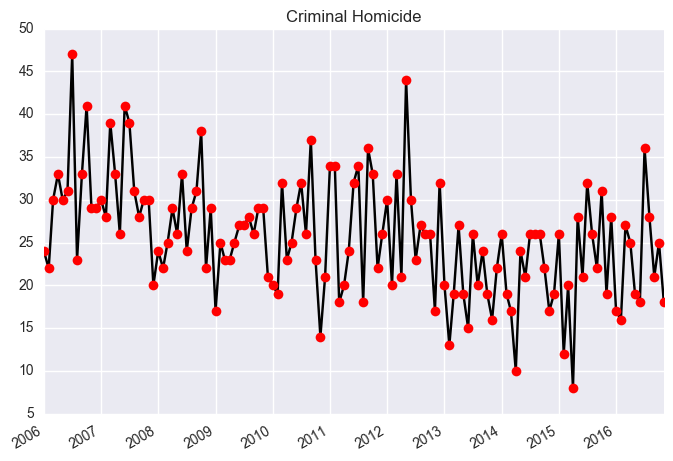

In [16]:
# Red dot with Line
fig, ax = plt.subplots()
ax.plot_date(homicide_d['Month'], homicide_d['Value'],'k')
ax.plot_date(homicide_d['Month'], homicide_d['Value'],'ro')
ax.set_title("Criminal Homicide")
fig.autofmt_xdate()
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-75.277728,39.869991,-74.957504,40.137895&bboxSR=4269&imageSR=4269&size=800,669&dpi=96&format=png32&f=image


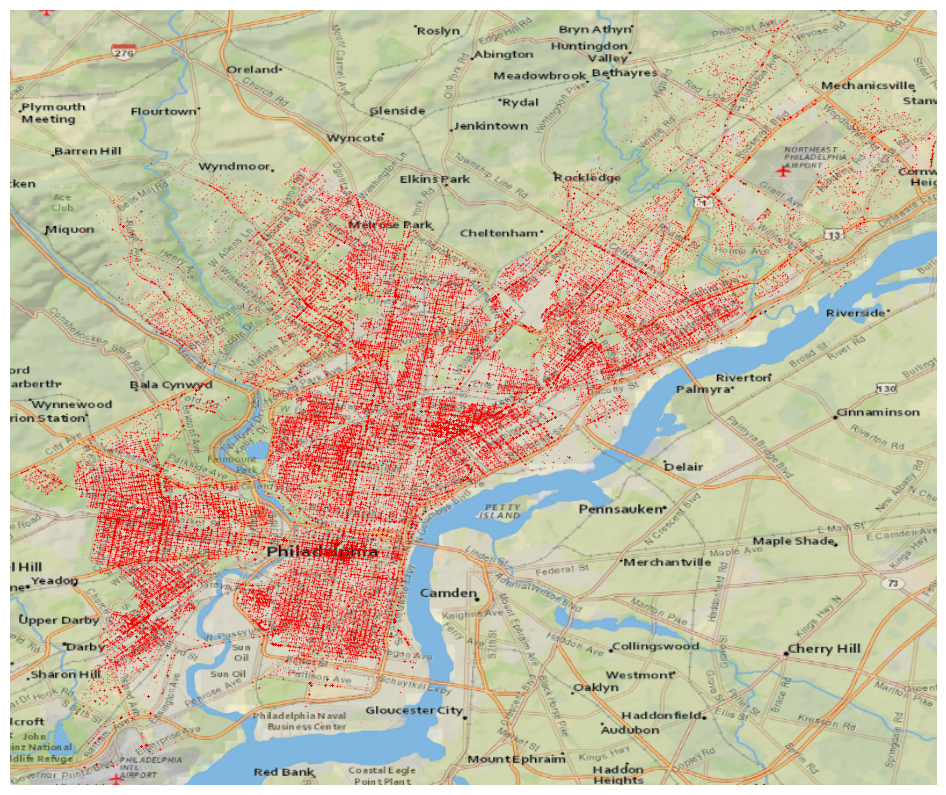

In [21]:
m = Basemap(projection='mill', llcrnrlat=d.Lat.min(), urcrnrlat=d.Lat.max(), 
            llcrnrlon=d.Lon.min(), urcrnrlon=d.Lon.max(), resolution='c', epsg=4269)
x, y = m(tuple(d.Lon[(d.Lon.isnull()==False) & (Dat.dt.year == 2015)]), \
         tuple(d.Lat[(d.Lat.isnull() == False) & (Dat.dt.year == 2015)]))

plt.figure(figsize=(20,10))
m.arcgisimage(service="NatGeo_World_Map", xpixels=800, verbose=True)
m.plot(x,y,'ro',markersize=1, alpha=.3 )
plt.show()